In [16]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Cargamos el dataset
df = pd.read_csv('C:/Users/HP/Documents/9-Master Big Data - Daniela/(MBD-2324) Trabajo Fin de Máster O1/cars_publications.csv')
print(f"Original dataset shape: {df.shape}")
df.head(10)

Original dataset shape: (20303, 8)


,marca,modelo,año,kilometraje,version,transmision,precio (MXN),ubicacion
0,Kia,Soul,2020,25606,1.6 LX AUTO,Automático,262999,Guadalajara
1,Nissan,Versa,2017,108034,1.6 SENSE AUTO,Automático,160999,Monterrey
2,Kia,Sportage,2018,62842,2.0 EX PACK AUTO,Automático,309999,Querétaro
3,Kia,Seltos,2021,45296,1.6 SX AUTO,Automático,345999,Ciudad de México
4,Renault,Duster,2018,80800,2.0 INTENS,Manual,189999,Ciudad de México
5,Fiat,Mobi,2019,83000,1.0 LIKE,Manual,154999,Ciudad de México
6,Honda,HR-V,2018,41612,1.8 TOURING CVT,Automático,310999,Ciudad de México
7,Nissan,V-Drive,2021,31600,1.6 VDRIVE AC,Manual,213999,Ciudad de México
8,Nissan,Sentra,2018,81000,1.8 ADVANCE AUTO,Automático,201999,Ciudad de México
9,Honda,CR-V,2016,72859,2.4 LX,Automático,266999,Ciudad de México


In [3]:
# Eliminamos valores nulos y duplicados
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f"Nuevo Dataset shape: {df.shape}")

Nuevo Dataset shape: (16331, 8)


In [4]:
# Imprimimos la informacion basica del dataset
print("Informacion basica del Dataset:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

Informacion basica del Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 16331 entries, 0 to 20301
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   marca         16331 non-null  object
 1   modelo        16331 non-null  object
 2   año           16331 non-null  int64 
 3   kilometraje   16331 non-null  int64 
 4   version       16331 non-null  object
 5   transmision   16331 non-null  object
 6   precio (MXN)  16331 non-null  int64 
 7   ubicacion     16331 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.1+ MB

Missing values per column:
marca           0
modelo          0
año             0
kilometraje     0
version         0
transmision     0
precio (MXN)    0
ubicacion       0
dtype: int64


In [5]:
# Crear un DataFrame con los valores únicos por columna
unique_values_df = pd.DataFrame({
    "Variable": df.columns,
    "Valores Únicos": [df[col].nunique() for col in df.columns]
})

# Mostrar la tabla
print(unique_values_df)

       Variable  Valores Únicos
0         marca              49
1        modelo             386
2           año              16
3   kilometraje            6156
4       version            2001
5   transmision               2
6  precio (MXN)             753
7     ubicacion               6


In [6]:
# Imprimimos resumen estadisticos de los valores de cada columna
categorical_columns = df.select_dtypes(include=['object']).columns
print("Numero de muestras por columnas categoricas:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())

Numero de muestras por columnas categoricas:

marca:
marca
Volkswagen       1575
Chevrolet        1499
Nissan           1483
Kia              1465
Mazda            1446
Honda             759
Audi              730
Bmw               670
Toyota            668
Hyundai           648
Ford              567
Mercedes Benz     564
Renault           517
Seat              487
Mini              370
Mg                352
Jeep              346
Suzuki            329
Dodge             183
Volvo             178
Peugeot           167
Fiat              142
Buick             128
Infiniti          112
Jac               108
Acura              98
Lincoln            85
Mitsubishi         77
Gmc                76
Chirey             73
Ram                59
Land Rover         43
Chrysler           41
Tesla              38
Cadillac           36
Baic               35
Smart              33
Cupra              28
Subaru             22
Porsche            22
Jaguar             19
Alfa Romeo         17
Changan          

In [61]:
# Contamos las combinaciones únicas de 'marca', 'modelo' y 'version'
modelo_version = df.groupby(['marca','modelo', 'version'])['modelo'].count().sort_values(ascending=False)
print (modelo_version)


marca       modelo           version                   
Mazda       CX-3             2.0 I GRAND TOURING 2WD AT    96
Volkswagen  Gol              1.6 5 PTAS. TRENDLINE         85
Mazda       Mazda 3          2.5 I GRAND TOURING AUTO      84
Kia         Rio              1.6 EX AUTO                   83
Chevrolet   Aveo             1.5 LS A                      82
                                                           ..
Suzuki      Kizashi          2.4 GLX CVT                    1
Chirey      Tiggo 8 Pro      1.6 PREMIUM DCT                1
            Tiggo 8 Pro Max  2.0 LUXURY DCT                 1
Jac         SEI2             1.5 ACTIVE                     1
Nissan      Kicks Play       1.2 HEV ADVANCE E-POWER        1
Name: modelo, Length: 2227, dtype: int64


In [70]:
# Crear una nueva columna combinando modelo y versión
df['modelo_version'] = df['modelo'] + ' ' + df['version']

# Contar combinaciones únicas de modelo+versión por marca y ordenarlas
count_per_marca = (
    df.groupby('marca')['modelo_version']
    .nunique()
    .reset_index()
    .rename(columns={'modelo_version': 'Unique Model-Version Count'})
    .sort_values(by='Unique Model-Version Count', ascending=False)
)

# Mostrar el resultado
print(count_per_marca)

            marca  Unique Model-Version Count
47     Volkswagen                         186
34         Nissan                         162
2            Audi                         143
8       Chevrolet                         142
4             Bmw                         115
46         Toyota                         107
14           Ford                         104
29          Mazda                          98
30  Mercedes Benz                          97
25            Kia                          93
18          Honda                          92
40           Seat                          78
19        Hyundai                          77
39        Renault                          63
32           Mini                          60
23           Jeep                          59
48          Volvo                          57
44         Suzuki                          53
36        Peugeot                          48
12          Dodge                          43
13           Fiat                 

In [7]:
df_regresion_st = df.describe()
df_regresion_st.T

,count,mean,std,min,25%,50%,75%,max
año,16331.0,2018.649317,2.493281,2010.0,2017.0,2019.0,2020.0,2025.0
kilometraje,16331.0,61908.251852,29456.012684,0.0,40000.0,60514.0,82661.5,300928.0
precio (MXN),16331.0,292959.872451,125254.104594,77999.0,206999.0,259999.0,339999.0,1187999.0


In [8]:
# Creamos funcion de histogramas
def plot_histogram(column, bins=70, xlabel=None, title=None):
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=bins, color='#3182bd', alpha=0.7)
    plt.xlabel(xlabel if xlabel else column)
    plt.title(title if title else f'Histograma de {column}')
    plt.show()

# Creamos funcion de boxplots
def plot_boxplot(column, title=None):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(title if title else f'Boxplot de {column}')
    plt.show()

# Creamos funcion de scatter plots
def plot_scatter(x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    plt.title(title, fontsize=14, weight='bold')
    plt.show()

# Creamos funcion de grafico de barras
def plot_bar_chart(count_series, title, xlabel):
    count_series.sort_values(ascending=True).plot(kind='barh', figsize=(8, 8), color='#3182bd', alpha=0.8)
    plt.xlabel(xlabel)
    plt.title(title, fontsize=12, weight='bold')
    plt.show()

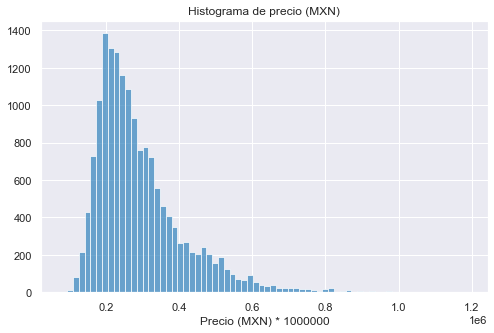

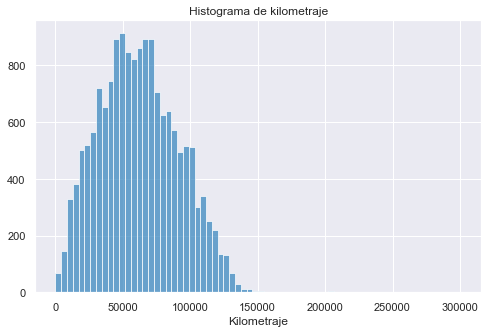

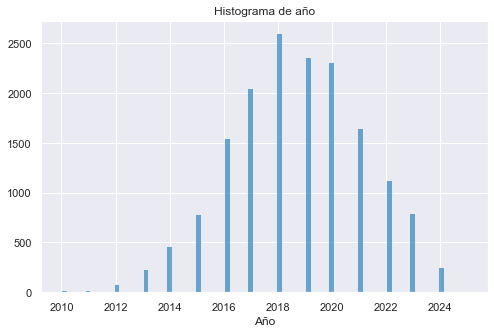

In [9]:
# Graficamos histogramas
plot_histogram('precio (MXN)', xlabel='Precio (MXN) * 1000000')
plot_histogram('kilometraje', xlabel='Kilometraje')
plot_histogram('año', xlabel='Año')

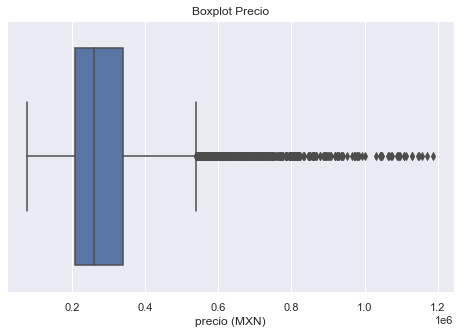

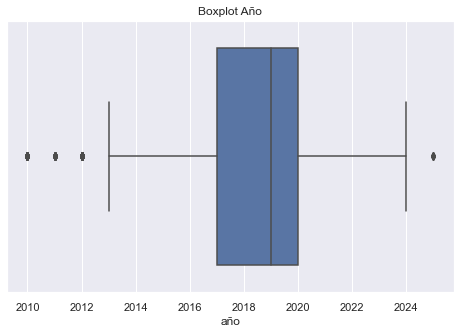

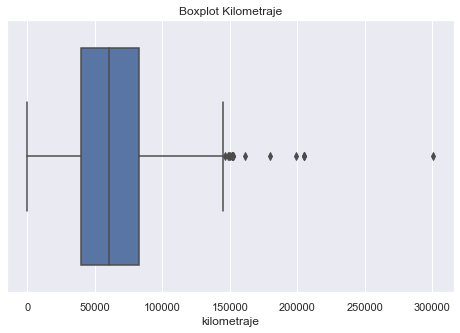

In [10]:
# Graficamos Boxplots
plot_boxplot('precio (MXN)', 'Boxplot Precio')
plot_boxplot('año', 'Boxplot Año')
plot_boxplot('kilometraje', 'Boxplot Kilometraje')

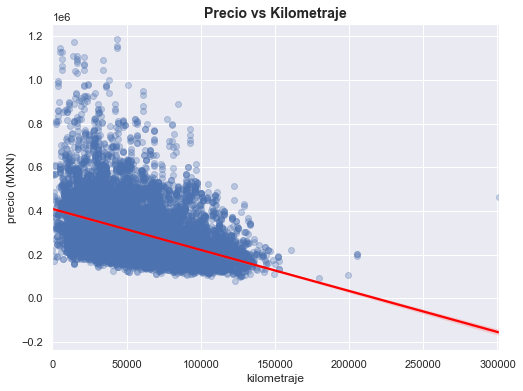

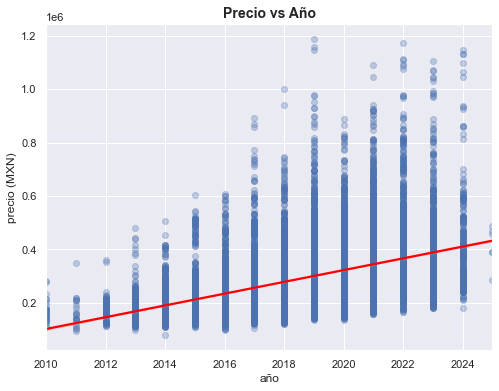

In [11]:
# Graficamos la relacion entre kilometraje vs precio y Año vs precio
plot_scatter('kilometraje', 'precio (MXN)', 'Precio vs Kilometraje')
plot_scatter('año', 'precio (MXN)', 'Precio vs Año')

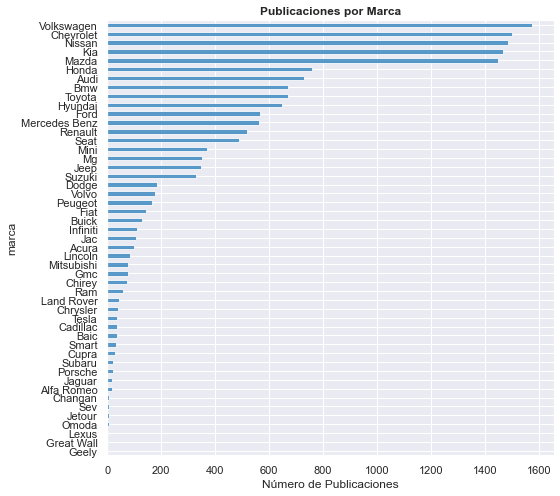

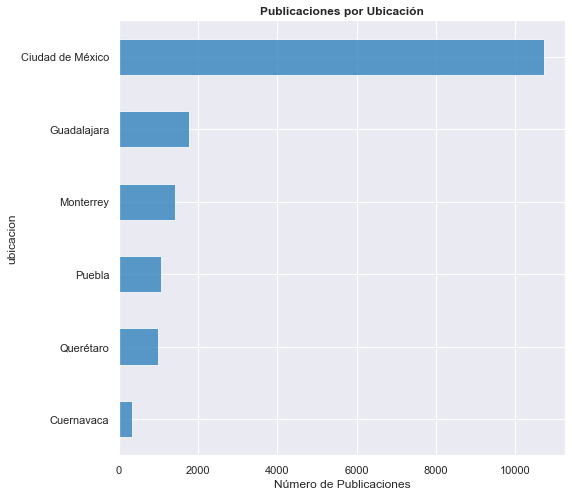

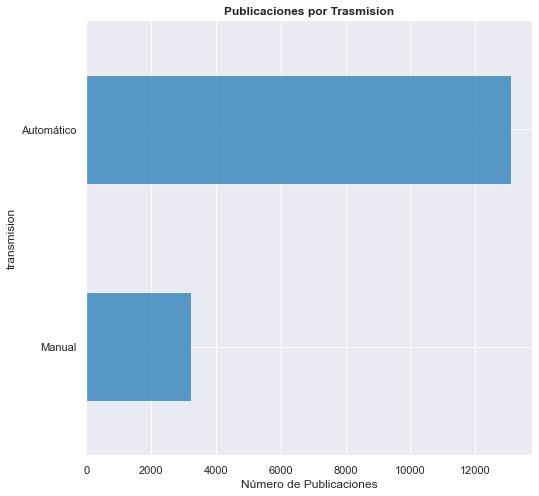

In [25]:
# Graficamos numero de publicaciones por marca, transmision y ubicacion
plot_bar_chart(df['marca'].value_counts(), 'Publicaciones por Marca', 'Número de Publicaciones')
plot_bar_chart(df['ubicacion'].value_counts(), 'Publicaciones por Ubicación', 'Número de Publicaciones')
plot_bar_chart(df['transmision'].value_counts(), 'Publicaciones por Trasmision', 'Número de Publicaciones')

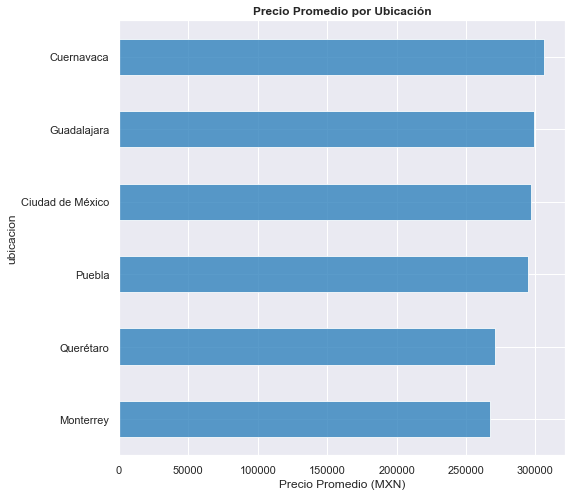

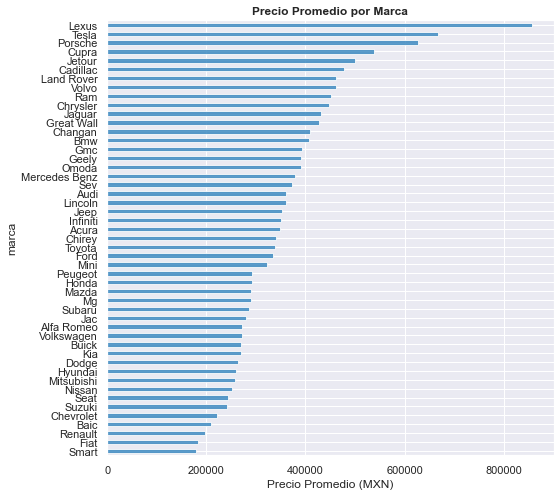

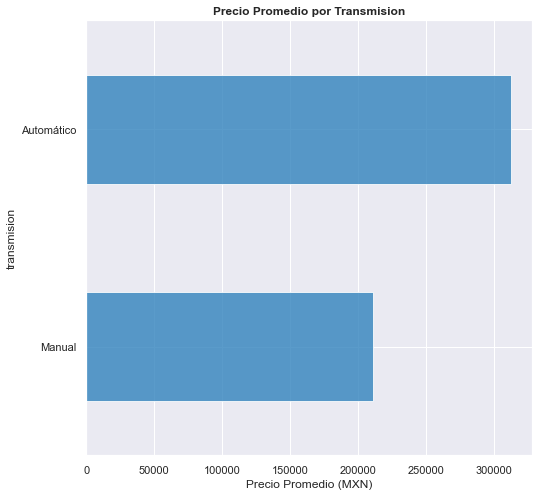

In [42]:
# Graficamos precio promedio por marca, transmision y ubicacion
precio_ubicacion = df.groupby('ubicacion')['precio (MXN)'].mean().sort_values()
plot_bar_chart(precio_ubicacion, 'Precio Promedio por Ubicación', 'Precio Promedio (MXN)')

precio_marca = df.groupby('marca')['precio (MXN)'].mean().sort_values()
plot_bar_chart(precio_marca, 'Precio Promedio por Marca', 'Precio Promedio (MXN)')

precio_transmision = df.groupby('transmision')['precio (MXN)'].mean().sort_values()
plot_bar_chart(precio_transmision, 'Precio Promedio por Transmision', 'Precio Promedio (MXN)')

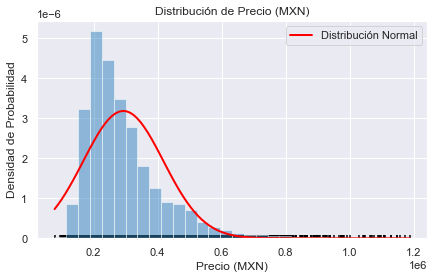

In [28]:
# Normal distribution plot
precio = df['precio (MXN)'].values
mu, sigma = stats.norm.fit(precio)

x_hat = np.linspace(min(precio), max(precio), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_hat, y_hat, linewidth=2, label='Distribución Normal', color='red')
ax.hist(precio, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.scatter(precio, np.full_like(precio, -0.01), marker='|', color='black')
ax.set_title('Distribución de Precio (MXN)')
ax.set_xlabel('Precio (MXN)')
ax.set_ylabel('Densidad de Probabilidad')
ax.legend()
plt.show()

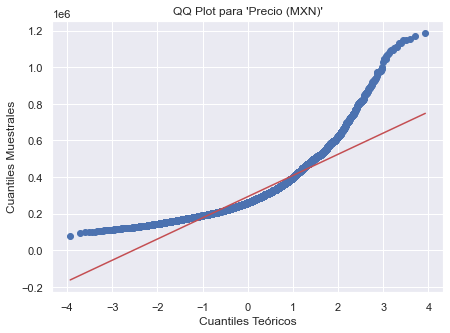

In [21]:
precio = df['precio (MXN)']

# Creamos el QQ plot
fig, ax = plt.subplots(figsize=(7, 5))
stats.probplot(precio, dist="norm", plot=ax)

ax.set_title("QQ Plot para 'Precio (MXN)'")
ax.set_xlabel("Cuantiles Teóricos")
ax.set_ylabel("Cuantiles Muestrales")

plt.show()

In [19]:
# Extraemos la columna de precios
precio = df['precio (MXN)']

# Aplicamos el test de Shapiro-Wilk
stat, p_value = stats.shapiro(precio)

# Imprimimos los resultados
print("Shapiro-Wilk Test:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretamos el resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: La distribución parece normal.")
else:
    print("Se rechaza la hipótesis nula: La distribución no es normal.")

Shapiro-Wilk Test:
Statistic: 0.8548
P-value: 0.0000
Se rechaza la hipótesis nula: La distribución no es normal.


In [23]:
# Seleccionamos solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['number']).columns

# Función para calcular el número de outliers usando el método IQR
def count_outliers_iqr(df, columns):
    outliers_count = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico

        # Definir límites para valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar valores fuera de los límites
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_count[col] = len(outliers)

    return outliers_count

# Calculamos los outliers para cada variable numérica
outliers_dict = count_outliers_iqr(df, numerical_cols)

# Convertimos a DataFrame para visualización en tabla
outliers_df = pd.DataFrame(list(outliers_dict.items()), columns=['Variable', 'Número de Outliers'])

# Mostramos la tabla
print(outliers_df)

       Variable  Número de Outliers
0           año                 139
1   kilometraje                  17
2  precio (MXN)                 760
